<a href="https://colab.research.google.com/github/towmi06/Web_Analyze_Economy/blob/Algorithms/ttcs_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
file_path = '/content/gdrive/MyDrive/Colab Notebooks/Total (1).csv'
df1 = pd.read_csv(file_path, encoding='ISO-8859-1')

df1.head()

,STT,Country,Continents,Rate of users Internet (%),Smart Device (%),Revenue of e-commerce platforms (billion USD),Revenue of IT industry (billion USD),Funding in digital infrastructure (billion USD),Foreign investment capital (billion USD),CREDIT and BANKING digital transformation ratio(%),Number of Enterprises Applying Digital Transformation (bussiness),Economic Growth Rate of Education (% GDP),Number of technology start up businesses,Year
0,1,Algeria,Africa,47.0,68.0,0.50,0.80,0.10,1.50,0.0,12000,4.1,800,2014
1,2,Angola,Africa,15.0,44.3,0.25,0.37,0.10,3.66,0.0,15000,3.5,170,2014
2,3,Benin,Africa,13.0,55.0,0.12,0.07,0.10,0.41,0.0,10000,3.5,80,2014
3,4,Botswana,Africa,21.0,77.0,0.20,0.20,0.07,0.52,0.0,18000,6.0,280,2014
4,5,Burkina Faso,Africa,4.5,65.5,0.10,0.10,0.06,0.36,0.0,8000,4.0,55,2014


In [6]:
# Hiển thị dữ liệu trong df
df1.shape

(1463, 14)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 14 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   STT                                                                1463 non-null   int64  
 1   Country                                                            1463 non-null   object 
 2   Continents                                                         1463 non-null   object 
 3   Rate of users Internet (%)                                         1463 non-null   float64
 4   Smart Device  (%)                                                  1463 non-null   float64
 5   Revenue of e-commerce platforms (billion USD)                      1463 non-null   float64
 6   Revenue of IT industry (billion USD)                               1463 non-null   float64
 7   Funding in digital infra

In [35]:
df1.tail()

,STT,Country,Continents,Rate of users Internet (%),Smart Device (%),Revenue of e-commerce platforms (billion USD),Revenue of IT industry (billion USD),Funding in digital infrastructure (billion USD),Foreign investment capital (billion USD),CREDIT and BANKING digital transformation ratio(%),Number of Enterprises Applying Digital Transformation (bussiness),Economic Growth Rate of Education (% GDP),Number of technology start up businesses,Year
1458,1459,Malaysia,Southeast Asia,93.0,95.0,560.000,5.120,0.65,0.0,60.0,75000,5.6,5500,2024
1459,1460,Indonesia,Southeast Asia,80.0,92.0,580.000,5.590,0.60,3.9,60.0,130000,5.0,4800,2024
1460,1461,Philippines,Southeast Asia,80.0,96.0,10.000,2.260,0.55,0.4,50.0,65000,4.7,5000,2024
1461,1462,Brunei,Southeast Asia,97.5,94.0,0.150,0.073,0.13,0.4,50.0,30000,3.1,250,2024
1462,1463,Timor-Leste,Southeast Asia,40.0,82.0,0.012,0.040,0.05,0.0,50.0,3500,5.6,110,2024


In [36]:
df1['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde (Cape Verde)', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros',
       'Congo, Democratic Republic of the (DR Congo)',
       'Congo, Republic of the (Republic of the Congo)', 'Djibouti',
       'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini (Swaziland)',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       "Ivory Coast (Côte d'Ivoire)", 'Kenya', 'Lesotho', 'Liberia',
       'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania',
       'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Canada',
       'The United States', 'Mexico', 'Belize', 'Costa Rica',
       'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Pan

In [37]:
# Xóa cột stt
df1 = df1.drop(columns=['STT'])

In [38]:
df1.head()

,Country,Continents,Rate of users Internet (%),Smart Device (%),Revenue of e-commerce platforms (billion USD),Revenue of IT industry (billion USD),Funding in digital infrastructure (billion USD),Foreign investment capital (billion USD),CREDIT and BANKING digital transformation ratio(%),Number of Enterprises Applying Digital Transformation (bussiness),Economic Growth Rate of Education (% GDP),Number of technology start up businesses,Year
0,Algeria,Africa,47.0,68.0,0.50,0.80,0.10,1.50,0.0,12000,4.1,800,2014
1,Angola,Africa,15.0,44.3,0.25,0.37,0.10,3.66,0.0,15000,3.5,170,2014
2,Benin,Africa,13.0,55.0,0.12,0.07,0.10,0.41,0.0,10000,3.5,80,2014
3,Botswana,Africa,21.0,77.0,0.20,0.20,0.07,0.52,0.0,18000,6.0,280,2014
4,Burkina Faso,Africa,4.5,65.5,0.10,0.10,0.06,0.36,0.0,8000,4.0,55,2014


In [39]:
# Kiểm tra các giá trị bị thiếu
print(df1.isnull().sum())


Country                                                              0
Continents                                                           0
Rate of users Internet (%)                                           0
Smart Device  (%)                                                    0
Revenue of e-commerce platforms (billion USD)                        0
Revenue of IT industry (billion USD)                                 0
Funding in digital infrastructure (billion USD)                      0
Foreign investment capital (billion USD)                             0
CREDIT and BANKING digital transformation ratio(%)                   0
Number of Enterprises Applying Digital Transformation (bussiness)    0
Economic Growth Rate of Education (% GDP)                            0
Number of technology start up businesses                             0
Year                                                                 0
dtype: int64


In [41]:
print(df1.columns)

Index(['Country', 'Continents', 'Rate of users Internet (%)',
       'Smart Device  (%)', 'Revenue of e-commerce platforms (billion USD)',
       'Revenue of IT industry (billion USD)',
       'Funding in digital infrastructure (billion USD)',
       'Foreign investment capital (billion USD)',
       'CREDIT and BANKING digital transformation ratio(%)',
       'Number of Enterprises Applying Digital Transformation (bussiness)',
       'Economic Growth Rate of Education (% GDP)',
       'Number of technology start up businesses', 'Year'],
      dtype='object')


In [66]:
# Set Target và feature
Target = ['CREDIT and BANKING digital transformation ratio(%)', 'Revenue of e-commerce platforms (billion USD)']
y = df1[Target]
X = df1.drop([
    'Year', 'Country', 'Continents',
    'Economic Growth Rate of Education (% GDP)',
    'CREDIT and BANKING digital transformation ratio(%)',
    'Smart Device  (%)'
], axis=1)


In [67]:
X.shape

(1463, 7)

In [68]:
X.head()

,Rate of users Internet (%),Revenue of e-commerce platforms (billion USD),Revenue of IT industry (billion USD),Funding in digital infrastructure (billion USD),Foreign investment capital (billion USD),Number of Enterprises Applying Digital Transformation (bussiness),Number of technology start up businesses
0,47.0,0.50,0.80,0.10,1.50,12000,800
1,15.0,0.25,0.37,0.10,3.66,15000,170
2,13.0,0.12,0.07,0.10,0.41,10000,80
3,21.0,0.20,0.20,0.07,0.52,18000,280
4,4.5,0.10,0.10,0.06,0.36,8000,55


Show tỷ lệ quan trọng các biến mục tiêu

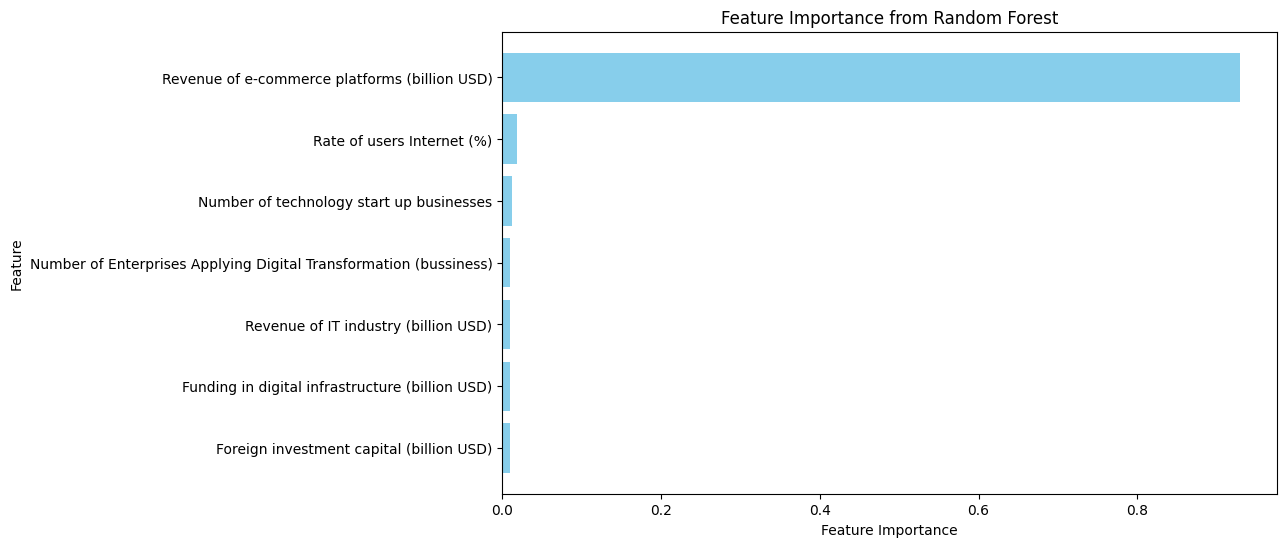

In [69]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình RandomForest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Lấy độ quan trọng của từng đặc trưng
feature_importances = rf.feature_importances_

# Chuyển đổi độ quan trọng của đặc trưng thành DataFrame để dễ quan sát
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sắp xếp các đặc trưng theo thứ tự độ quan trọng giảm dần
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Hiển thị độ quan trọng của đặc trưng dưới dạng biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Đảm bảo X = y
X = X[:len(y)]
y = y[:len(X)]

# Train - test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Chuẩn hóa
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [71]:
X_train.shape

(1170, 7)

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Khởi tạo mô hình Random Forest
rf = RandomForestRegressor(random_state=42)

# Định nghĩa các tham số
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 50, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}


# Sử dụng RandomizedSearchCV để tìm tham số tốt nhất
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_dist, n_iter=100,
    cv=5, n_jobs=-1, verbose=2, scoring='r2', random_state=42
)


# Huấn luyện mô hình với dữ liệu
random_search.fit(X_train_scaled, y_train)

# Mô hình tốt nhất từ RandomizedSearchCV
best_rf = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [73]:
# Dự đoán với mô hình tốt nhất trên tập test
y_pred_rf = best_rf.predict(X_test_scaled)

# Tính toán các chỉ số đánh giá cho Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest - Best Parameters:", random_search.best_params_)
print(f"Random Forest - RMSE: {np.sqrt(mse_rf):.2f}")
print(f"Random Forest - R²: {r2_rf:.2f}")

Random Forest - Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Random Forest - RMSE: 13.63
Random Forest - R²: 0.81


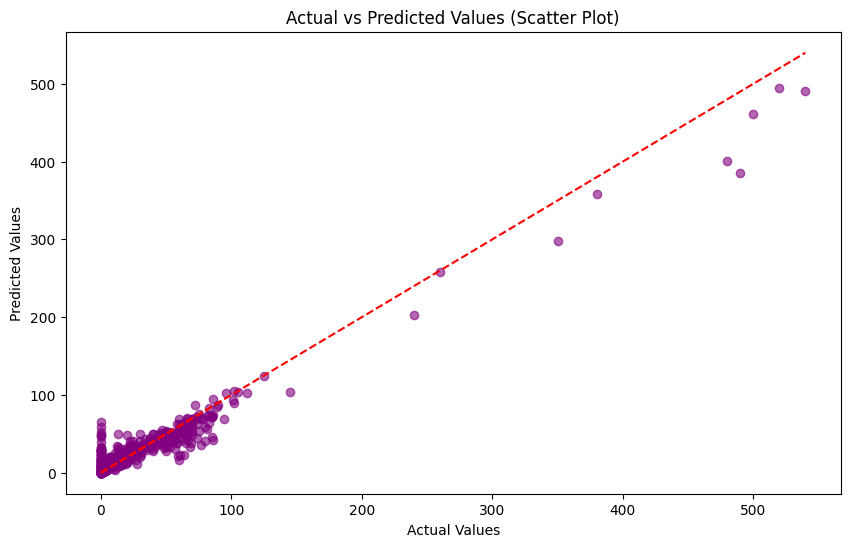

In [74]:
# Vẽ biểu đồ phân tán để kiểm tra độ chính xác của dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Scatter Plot)")
plt.show()

-> Điểm nào càng gần đường chéo lý tưởng thì càng chính xác

In [75]:
# Đảm bảo y_test và y_pred có cùng độ dài
min_length = min(len(y_test), len(y_pred_rf))
y_test_trimmed = y_test[:min_length].values.ravel()  # chuyển về mảng 1 chiều
y_pred_trimmed = y_pred_rf[:min_length].ravel()

# Tạo DataFrame để so sánh dữ liệu thực tế và dữ liệu dự đoán
comparison_df = pd.DataFrame({
    'Actual': y_test_trimmed,
    'Predicted': y_pred_trimmed
})

# In ra DataFrame
print(comparison_df)


     Actual  Predicted
0      0.00  23.152000
1      0.12   0.160770
2      0.00  29.680000
3      0.80   1.260100
4     77.00  35.606000
..      ...        ...
581    0.35   0.385433
582    0.00   3.780000
583    0.33   0.308033
584   17.00  23.273333
585    0.12   0.174850

[586 rows x 2 columns]


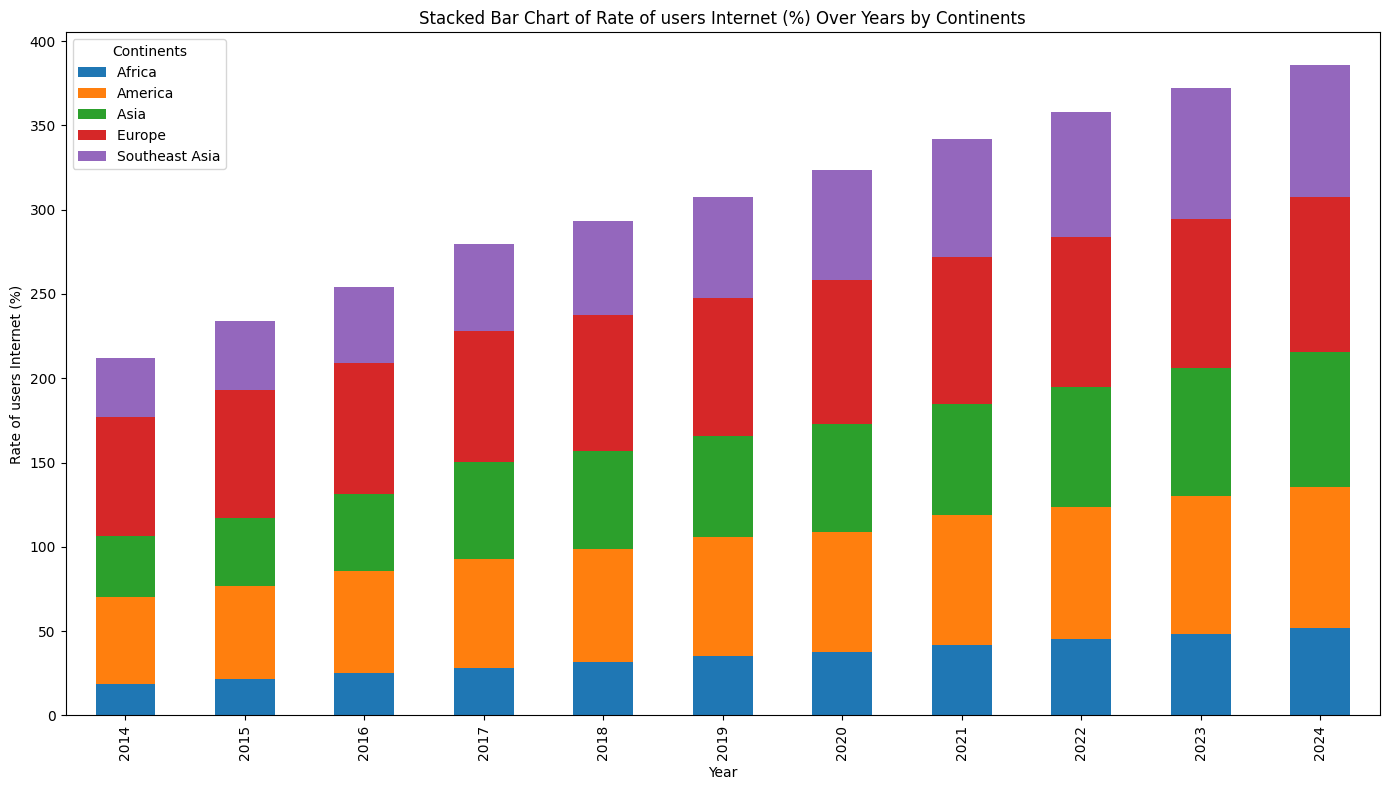

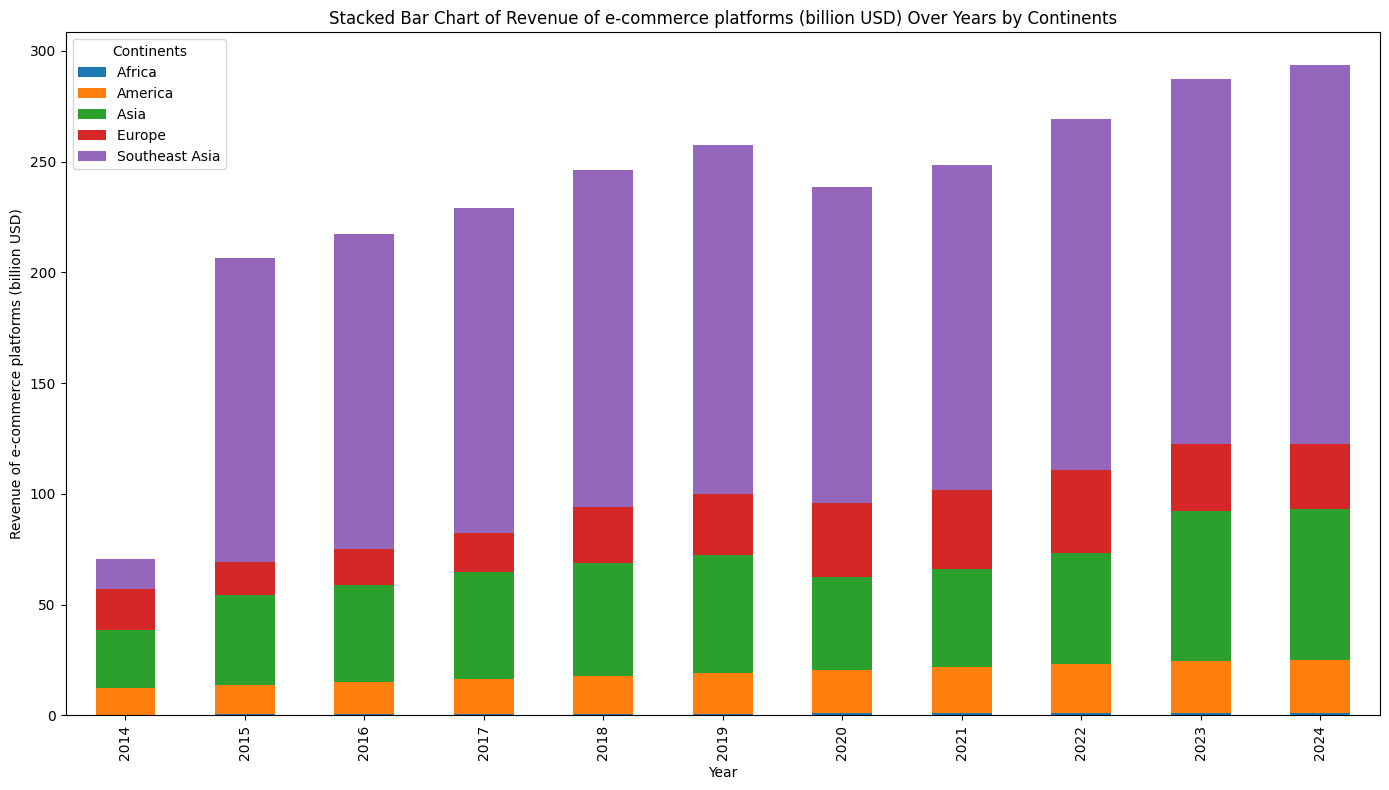

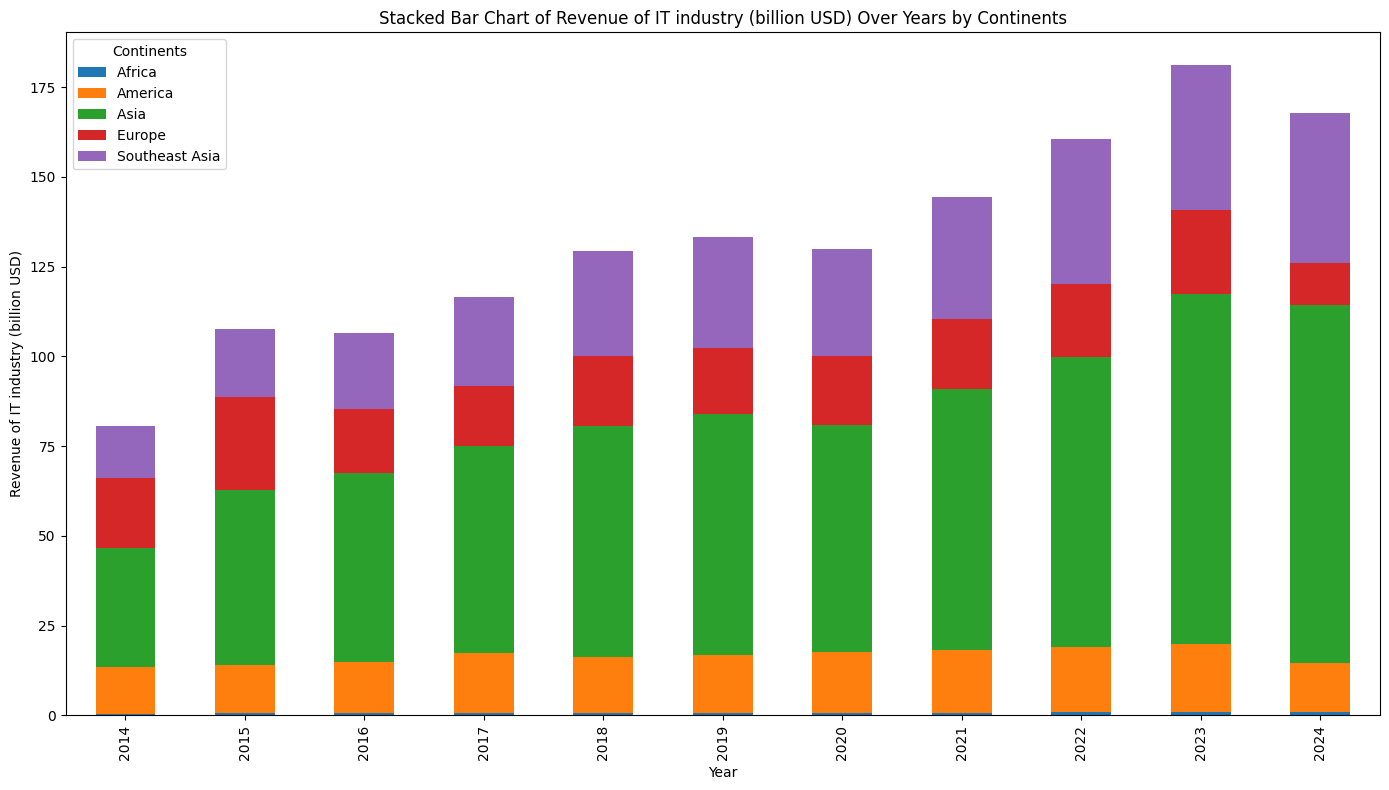

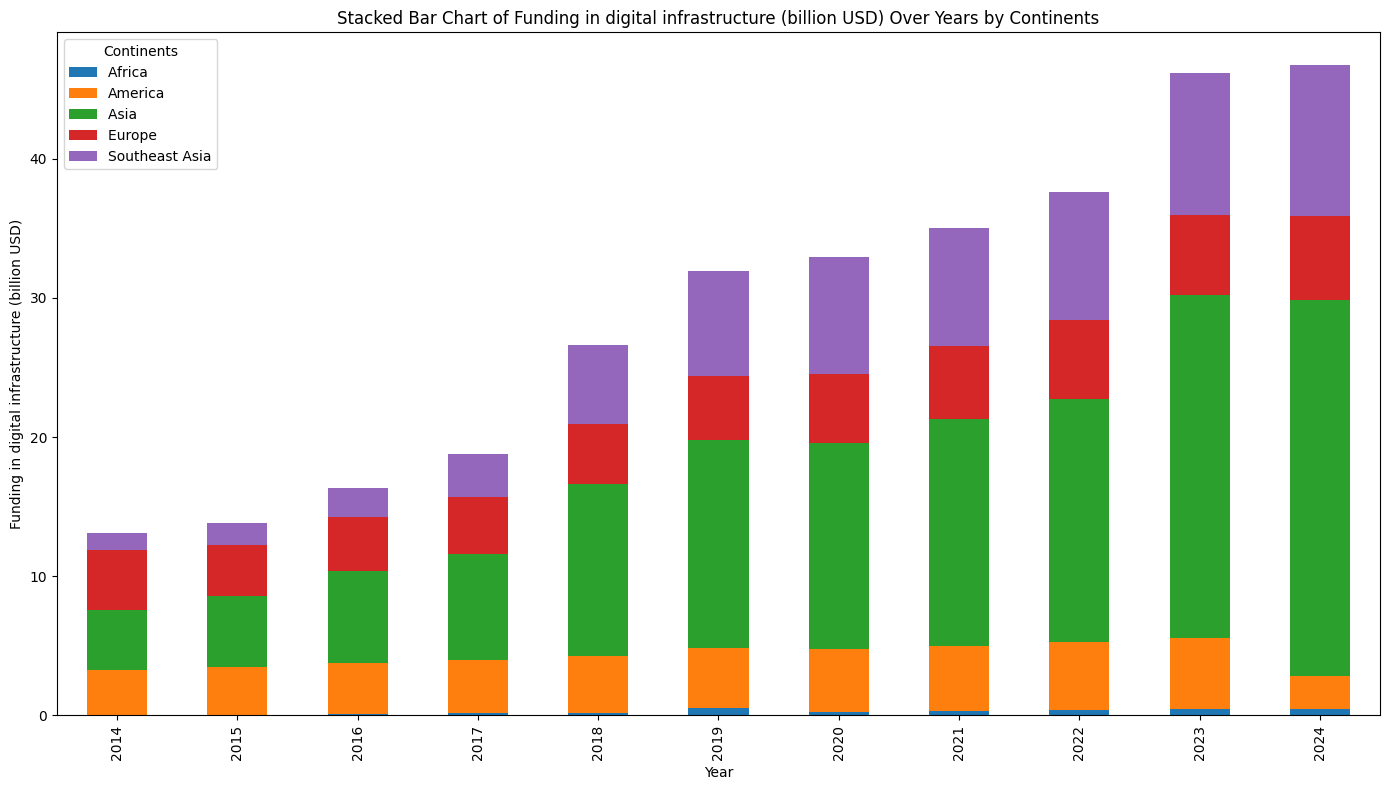

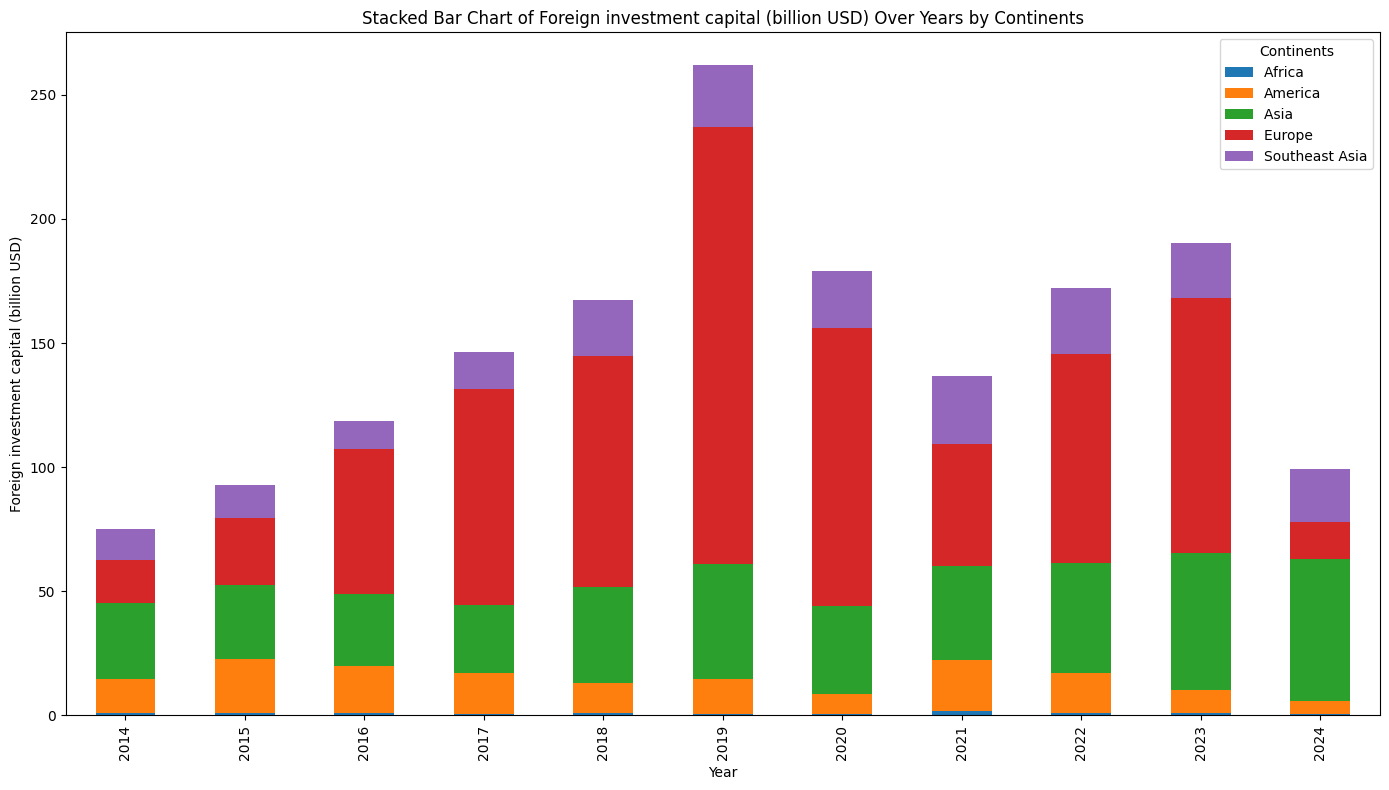

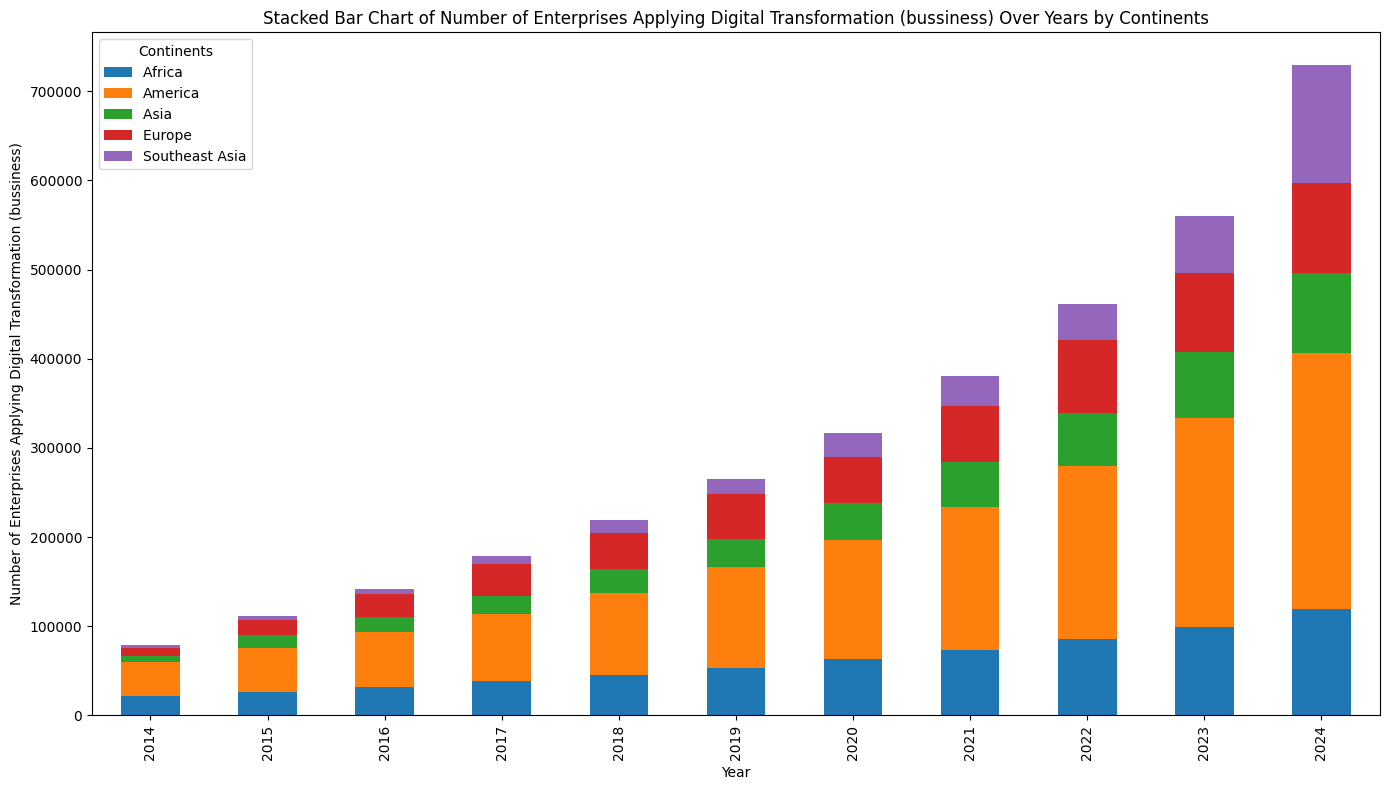

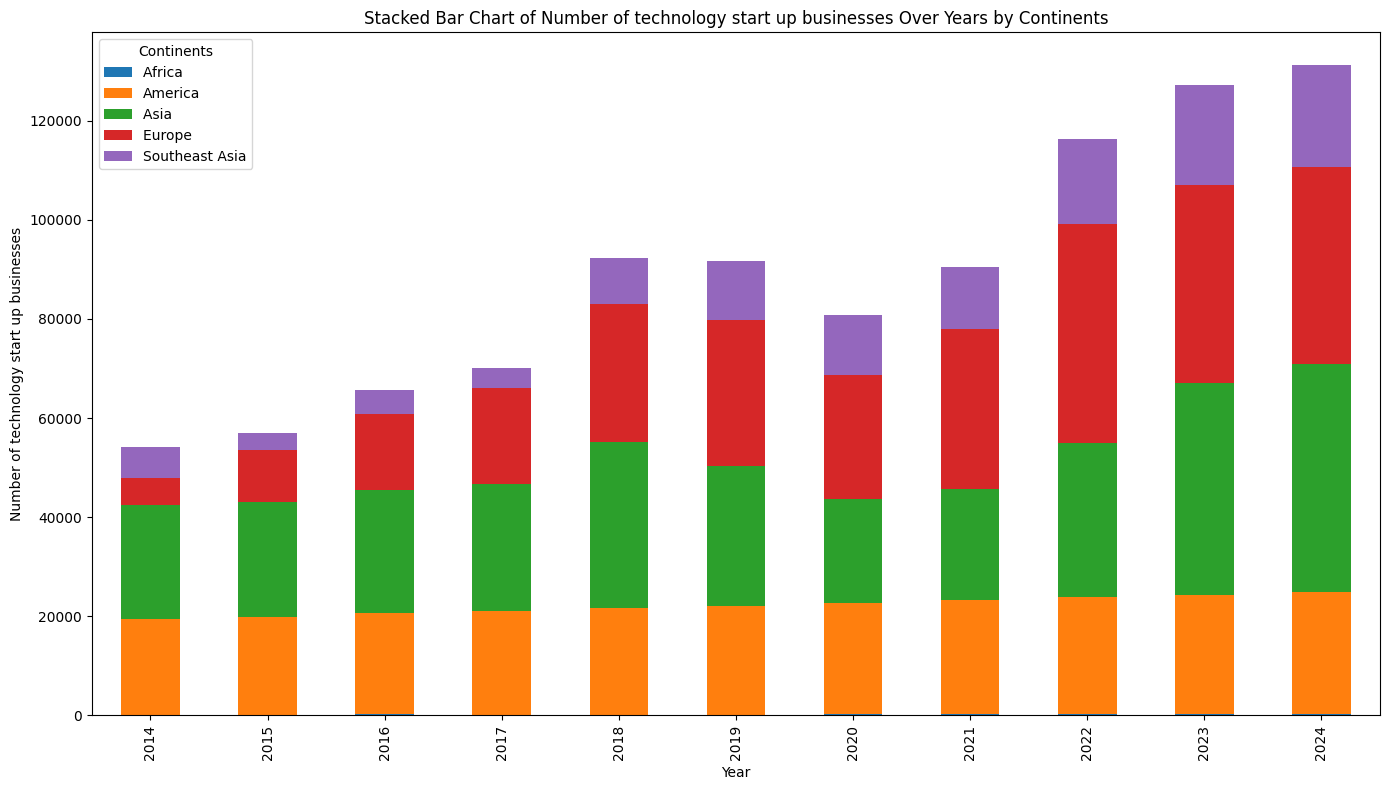

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

features = X.columns  # Các cột đặc trưng

# Tạo bảng pivot bằng việc lặp qua các features
for feature in features:
    # Tạo bảng pivot cho đặc trưng hiện tại
    pivot_table = df1.pivot_table(values=feature, index='Year', columns='Continents', aggfunc='mean')

    # Vẽ biểu đồ chồng
    plt.figure(figsize=(14, 8))
    pivot_table.plot(kind='bar', stacked=True, ax=plt.gca())

    # Thiết lập tiêu đề và nhãn cho các trục
    plt.title(f'Stacked Bar Chart of {feature} Over Years by Continents')
    plt.xlabel('Year')
    plt.ylabel(feature)

    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()
